In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

The dataset was found [https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls]
This is a dataset of retail sales of a national superstore from 2014 to 2017.

In [531]:
df = pd.read_excel('Superstore.xls', header=0, index_col=0, parse_dates=[3,4])
df.head()

/var/folders/1h/_61p4dz52j77drrrw684c1700000gn/T/ipykernel_89005/2993375601.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_excel('Superstore.xls', header=0, index_col=0, parse_dates=[3,4])


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [533]:
# clean out product ids, order id, and row id, since we are focusing on aggregate stats
df = df.drop(['Order ID', 'Product ID', 'Postal Code'], axis=1)

**Sales**

*Sales by region*

In [535]:
# sales by region
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.sort_values(ascending=False)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

*Sales by state/city*

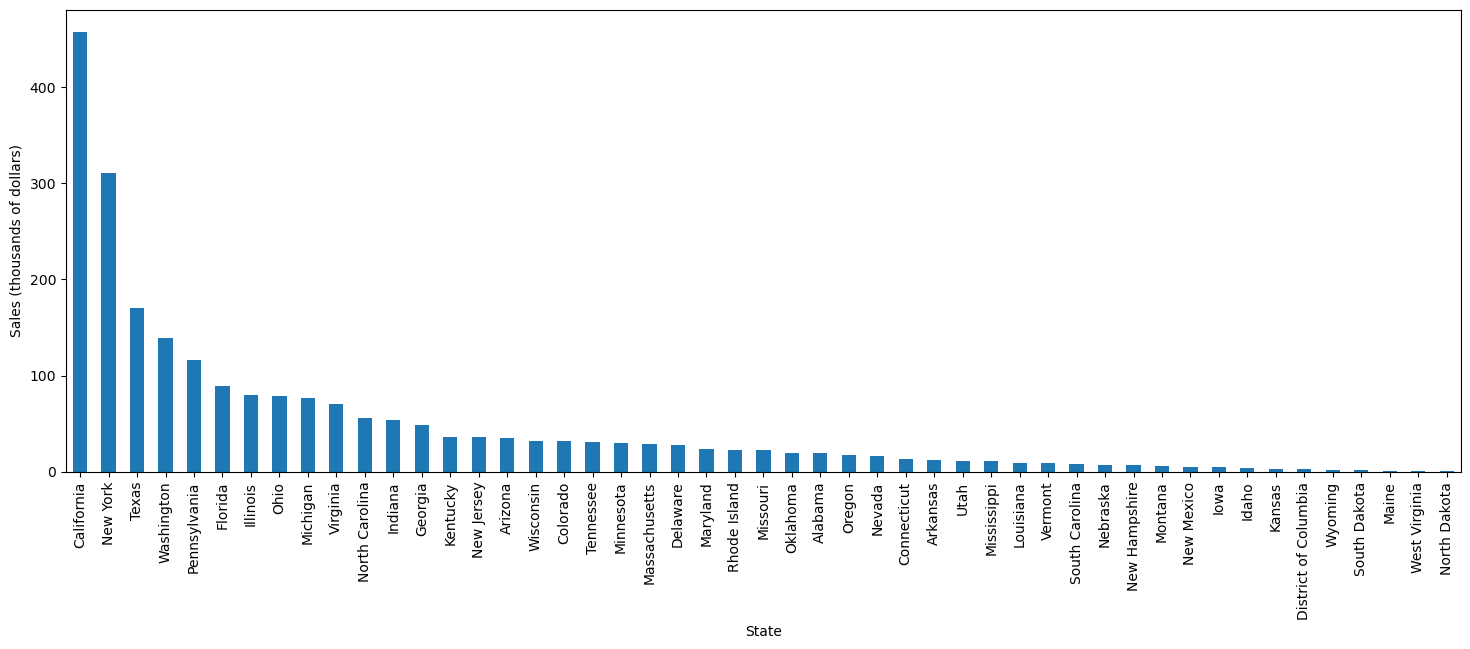

In [565]:
# sales by state 
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
# sales by city, can use this filter by city
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

plot = (state_sales/1000).plot(kind='bar', figsize=(18, 6))
plot.set_ylabel("Sales (thousands of dollars)")
plt.show()

*Comparison of sales by category across regions/states:*

/var/folders/1h/_61p4dz52j77drrrw684c1700000gn/T/ipykernel_89005/1118660291.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])


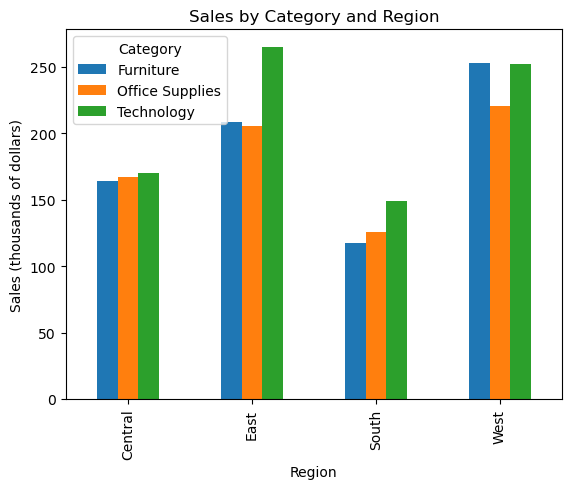

In [591]:
# most popular category by region (sales)
popular_category_region = df.groupby(by=['Region', 'Category'])['Sales'].sum()

# convert series into dataframe for easier plotting 
dataframe = popular_category_region.unstack().reset_index()

ax = dataframe.plot(kind='bar', x='Region', y=['Furniture', 'Office Supplies', 'Technology'])
ax.set_ylabel('Sales (thousands of dollars)')
ax.set_title('Sales by Category and Region')
ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])
plt.show()


/var/folders/1h/_61p4dz52j77drrrw684c1700000gn/T/ipykernel_89005/3904961326.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])
/var/folders/1h/_61p4dz52j77drrrw684c1700000gn/T/ipykernel_89005/3904961326.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])
/var/folders/1h/_61p4dz52j77drrrw684c1700000gn/T/ipykernel_89005/3904961326.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])


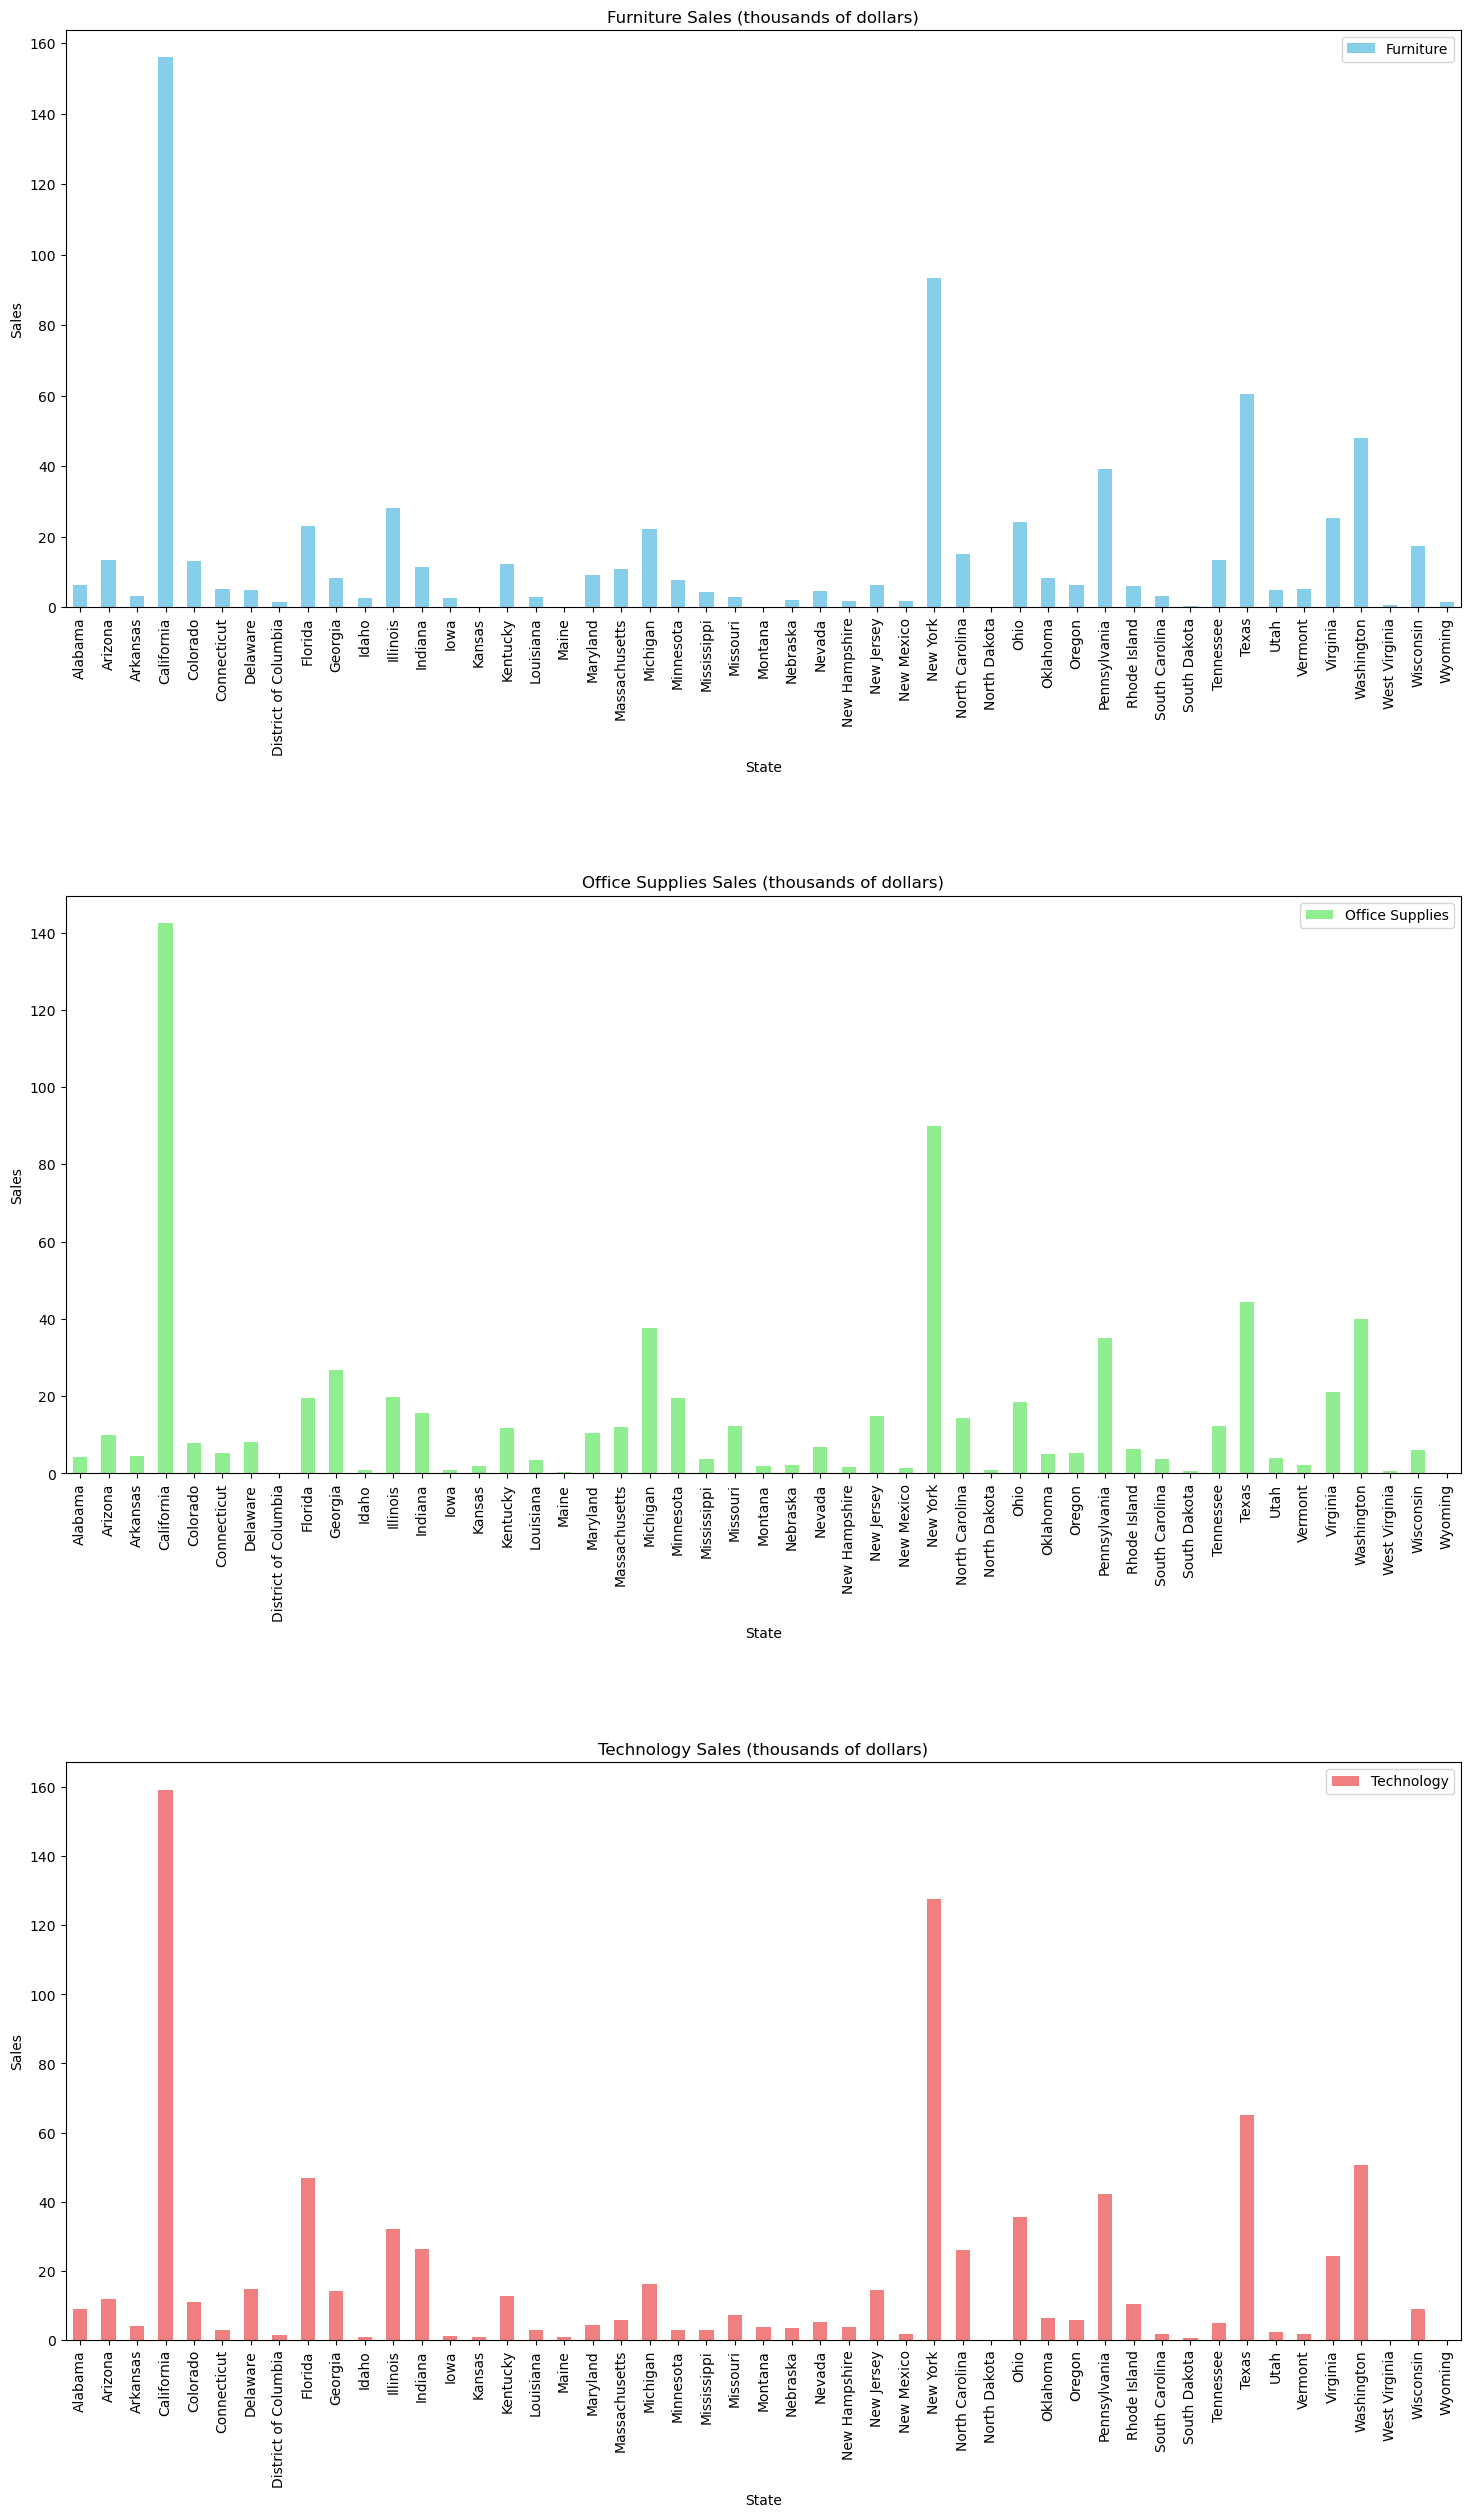

In [543]:
# category sales by state: 
category_sales_states = df.groupby(by=['State', 'Category'])['Sales'].sum()
category_sales_states.head(50)

# convert series into dataframe for easier plotting 
category_sales_states = category_sales_states.unstack().reset_index()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 30))  # Create subplots with 1 row and 3 columns

category_sales_states.plot(kind='bar', x='State', y='Furniture', ax=axes[0], color='skyblue', title='Furniture Sales (thousands of dollars)')
category_sales_states.plot(kind='bar', x='State', y='Office Supplies', ax=axes[1], color='lightgreen', title='Office Supplies Sales (thousands of dollars)')
category_sales_states.plot(kind='bar', x='State', y='Technology', ax=axes[2], color='lightcoral', title='Technology Sales (thousands of dollars)')

for ax in axes:
    ax.set_xlabel('State')
    ax.set_ylabel('Sales')
    ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])

plt.subplots_adjust(hspace=0.5)
plt.show()

**Profit:**

*Profits by Category and Region*

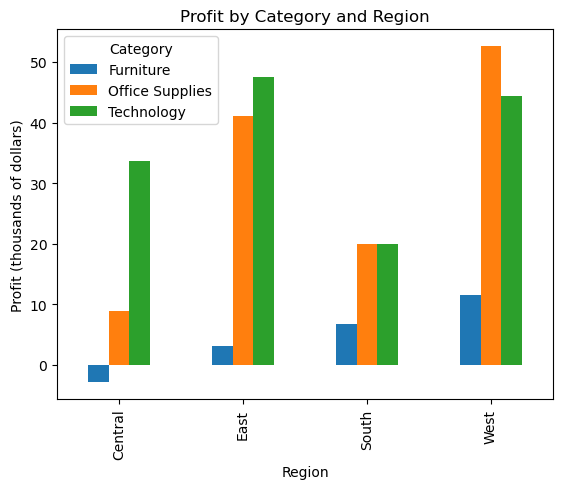

In [587]:
# profits by region/state
# most popular category by region (profit)
category_region_profit = df.groupby(by=['Region', 'Category'])['Profit'].sum()

# convert series into dataframe for easier plotting 
dataframe = category_region_profit.unstack().reset_index()
dataframe['Furniture'], dataframe['Office Supplies'], dataframe['Technology'] = dataframe['Furniture']/1000, dataframe['Office Supplies']/1000, dataframe['Technology']/1000

ax = dataframe.plot(kind='bar', x='Region', y=['Furniture', 'Office Supplies', 'Technology'])
ax.set_ylabel('Profit (thousands of dollars)')
ax.set_title('Profit by Category and Region')
plt.show()

# profits margins of different categories/subcategories
# least profitable products (before/after discount rate)

*Category Profit by state*

/var/folders/1h/_61p4dz52j77drrrw684c1700000gn/T/ipykernel_89005/2875613855.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])
/var/folders/1h/_61p4dz52j77drrrw684c1700000gn/T/ipykernel_89005/2875613855.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])
/var/folders/1h/_61p4dz52j77drrrw684c1700000gn/T/ipykernel_89005/2875613855.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])


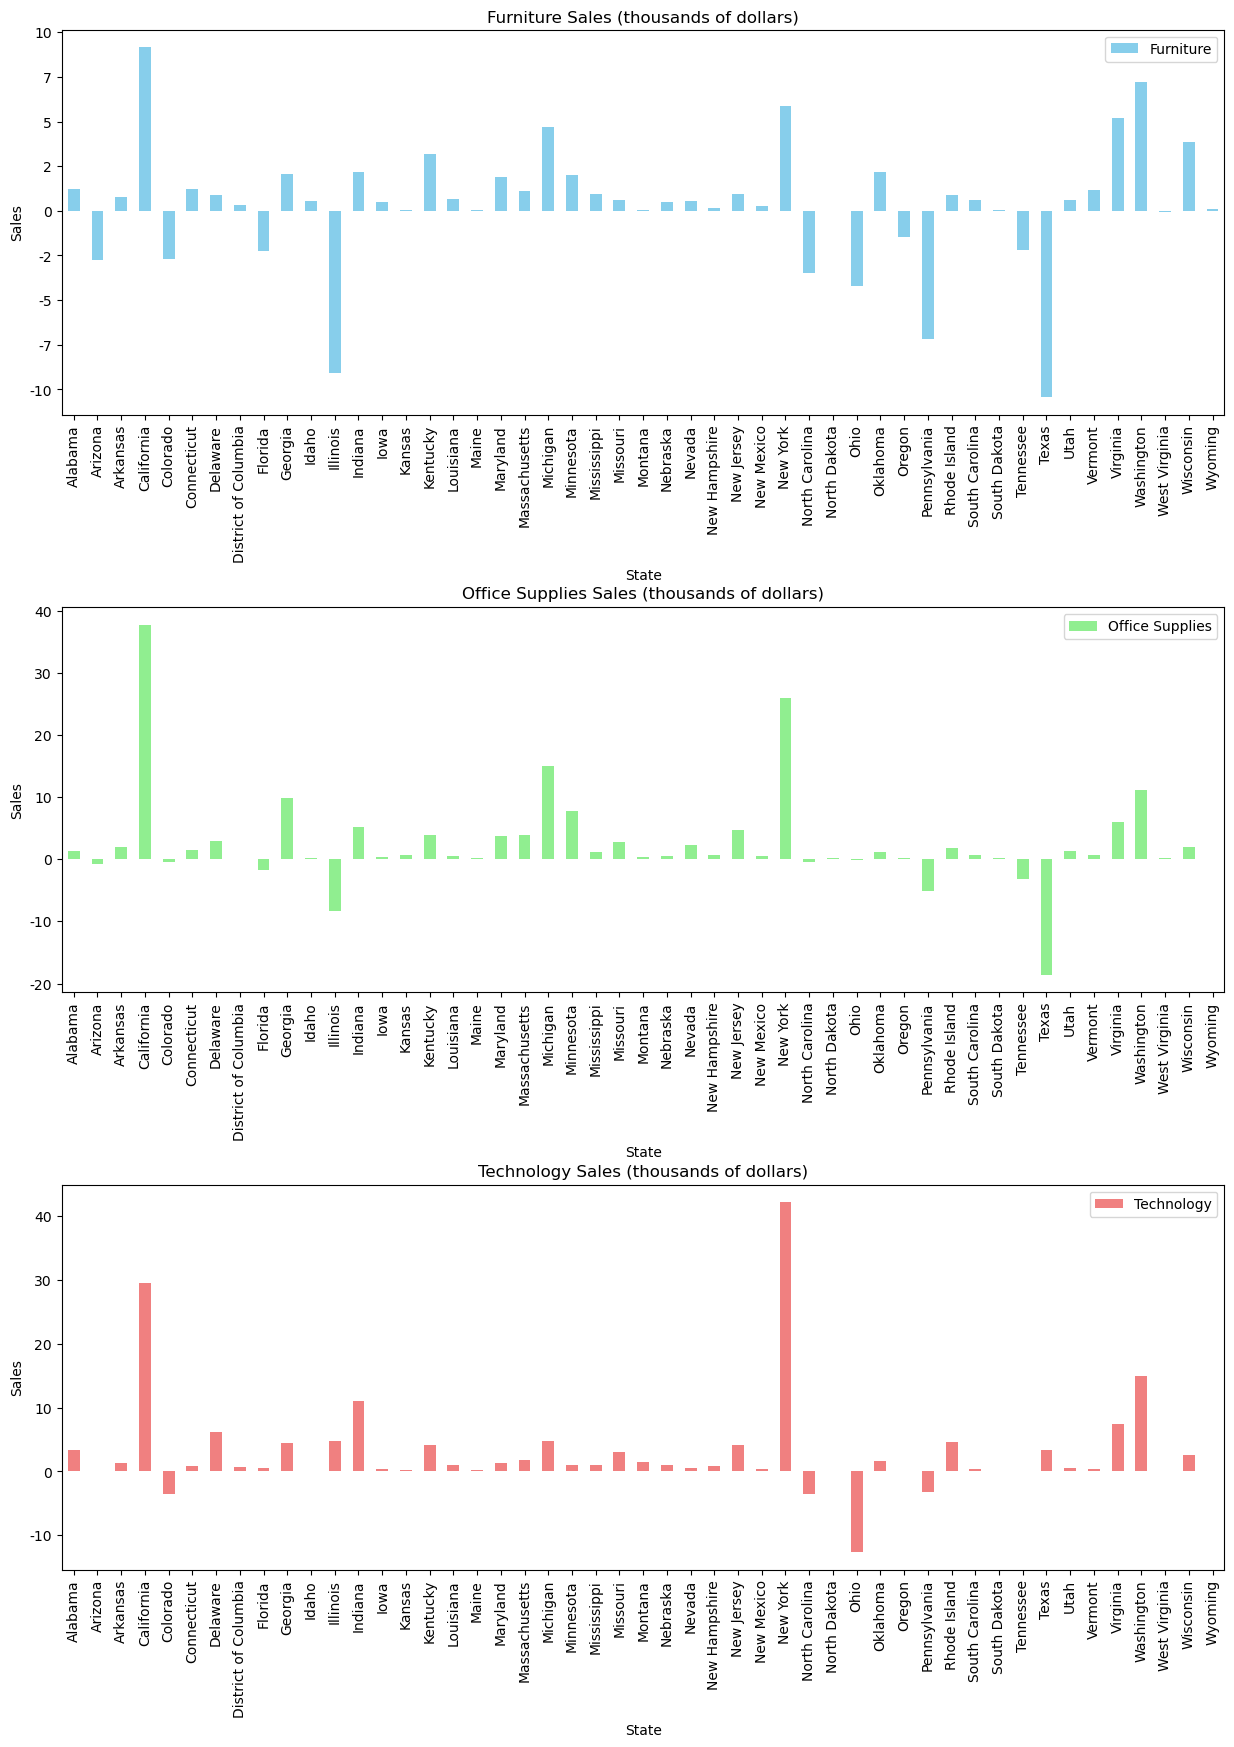

In [627]:
# category profit by state: 
category_profit_states = df.groupby(by=['State', 'Category'])['Profit'].sum()
category_profit_states.head(50)

# convert series into dataframe for easier plotting 
category_profit_states = category_profit_states.unstack().reset_index()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))  # Create subplots with 1 row and 3 columns

category_profit_states.plot(kind='bar', x='State', y='Furniture', ax=axes[0], color='skyblue', title='Furniture Sales (thousands of dollars)')
category_profit_states.plot(kind='bar', x='State', y='Office Supplies', ax=axes[1], color='lightgreen', title='Office Supplies Sales (thousands of dollars)')
category_profit_states.plot(kind='bar', x='State', y='Technology', ax=axes[2], color='lightcoral', title='Technology Sales (thousands of dollars)')

for ax in axes:
    ax.set_xlabel('State')
    ax.set_ylabel('Sales')
    ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])

plt.subplots_adjust(hspace=0.5)
plt.show()

**Dataset filtered by year**
This can be applied to any of the other analyses to compare different metrics by year. 

In [665]:
df_2014 = df[df['Order Date'].dt.year == 2014]
df_2015 = df[df['Order Date'].dt.year == 2015]
df_2016 = df[df['Order Date'].dt.year == 2016]
df_2017 = df[df['Order Date'].dt.year == 2017]

*Sales/Profit by year*

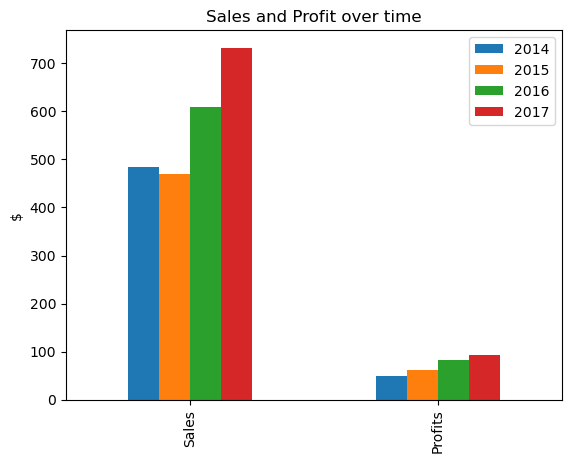

In [751]:
sales = [df_2014['Sales'].sum(), df_2015['Sales'].sum(), df_2016['Sales'].sum(), df_2017['Sales'].sum()]
profits =  [df_2014['Profit'].sum(), df_2015['Profit'].sum(), df_2016['Profit'].sum(), df_2017['Profit'].sum()]
years = [2014, 2015, 2016, 2017]
# divide by thousand:
sales = [(amount / 1000) for amount in sales]
profits = [(amount / 1000) for amount in profits]

s = pd.DataFrame([sales, profits], columns=years)

ax = s.plot(kind='bar')
ax.set_xticklabels(['Sales', 'Profits'])
ax.set_ylabel('$')
ax.set_title('Sales and Profit over time')
plt.show()

**Shipping time:**
D.C found to have the highest rate of shipping time taking 6+ days.

count                         9994
mean     3 days 22:59:46.311787072
std      1 days 17:56:29.766161104
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: Shipping Time, dtype: object

Region
Central   4 days 01:23:41.093413689
East      3 days 21:48:32.359550561
South     3 days 22:59:33.333333333
West      3 days 22:18:50.689978145
Name: Shipping Time, dtype: timedelta64[ns]


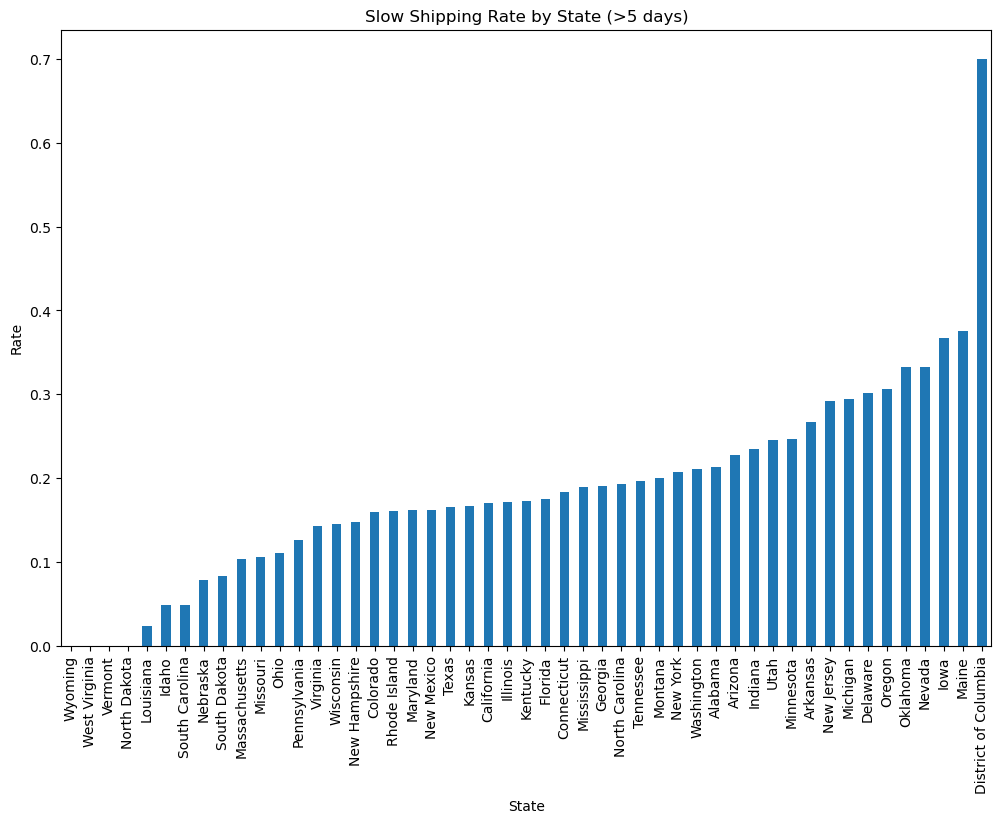

In [595]:
# mean shipping time overall
df['Shipping Time'] = df['Ship Date'] - df['Order Date'] 
print(df['Shipping Time'].describe())
print()

# shipping time by region/state
avg_shipping_region = df.groupby(by=['Region'])['Shipping Time'].mean()
print(avg_shipping_region)

# shipping time by region/state
avg_shipping_state = df.groupby(by=['State'])['Shipping Time'].mean()

# filter for where shipping took 6+ days 
slow_shipping = df[(df['Shipping Time'] > '5 days')]

# compare slow shipping rate across regions/state
slow_ship_state_count = slow_shipping.groupby('State').count()['Shipping Time']
# count of orders by state
state_order_count = df.groupby('State').count()['Sales']
# track the rate of slow shipping across states
slow_ship_rate_state = (slow_ship_state_count / state_order_count).round(3).fillna(0)
slow_ship_rate_state = slow_ship_rate_state.sort_values()
slow_ship_rate_state.rename('Slow Shipping Rate')
ax = slow_ship_rate_state.plot(kind='bar', figsize=(12, 8))
ax.set_ylabel('Rate')
ax.set_title("Slow Shipping Rate by State (>5 days)")
plt.show()